In [7]:
# Parameters
INPUT_FILE = './res/pair_selection.csv'
MAX_ORDER = 9
SCORE_LIST = [13,8,5,3,2,1,1,1,1]

assert len(SCORE_LIST) == MAX_ORDER

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [3]:
def replace_nan(data):
    """Replace NaN Value
        If a column contains numerical value, replace it with 0.
        Otherwise, replace it with 'UNKNOWN'"""
    
    df = data.copy()
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(0, inplace = True)
        else:
            df[col].fillna('UNKNOWN', inplace = True)
    return df

In [4]:
pre_df = pd.read_csv(INPUT_FILE)

In [5]:
pre_df.head()

,ID,pair 1,pair 2,pair 3,pair 4,pair 5,pair 6,pair 7,pair 8,pair 9,pair 10,pair 11,pair 12,pair 13,pair 14,pair 15,pair 16,pair 17,pair 18
0,6338110221,NaN,9.0,NaN,8.0,7.0,6.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,5.0,2.0
1,6030127721,NaN,NaN,NaN,NaN,NaN,5.0,1.0,7.0,9.0,NaN,NaN,8.0,NaN,3.0,4.0,6.0,2.0,NaN
2,6130584921,NaN,1.0,2.0,NaN,NaN,NaN,6.0,NaN,NaN,7.0,8.0,9.0,NaN,NaN,3.0,4.0,5.0,NaN
3,6238084521,NaN,NaN,NaN,NaN,4.0,1.0,NaN,2.0,5.0,NaN,7.0,9.0,NaN,NaN,6.0,3.0,NaN,8.0
4,6230078321,NaN,NaN,NaN,NaN,NaN,6.0,9.0,8.0,NaN,NaN,1.0,4.0,5.0,NaN,3.0,7.0,2.0,NaN


# Data Preprocessing

In [24]:
df = replace_nan(pre_df)

In [25]:
score_transform = {k: v for k, v in zip(range(1, MAX_ORDER + 1), SCORE_LIST)}
df.replace(score_transform, inplace = True)
df.head()

,ID,pair 1,pair 2,pair 3,pair 4,pair 5,pair 6,pair 7,pair 8,pair 9,pair 10,pair 11,pair 12,pair 13,pair 14,pair 15,pair 16,pair 17,pair 18
0,6338110221,0.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,13.0,2.0,8.0
1,6030127721,0.0,0.0,0.0,0.0,0.0,2.0,13.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0,3.0,1.0,8.0,0.0
2,6130584921,0.0,13.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,3.0,2.0,0.0
3,6238084521,0.0,0.0,0.0,0.0,3.0,13.0,0.0,8.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,0.0,1.0
4,6230078321,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,13.0,3.0,2.0,0.0,5.0,1.0,8.0,0.0


# Correlation Matrix

In [26]:
pair_score = df[[col for col in df if 'pair' in col]]
corr = pair_score.corr()
corr_table = corr.unstack().reset_index(name = 'Value')
corr_table.columns = ['#1', '#2', 'Value']
corr_table.head()

,#1,#2,Value
0,pair 1,pair 1,1.000000
1,pair 1,pair 2,0.356718
2,pair 1,pair 3,0.237812
3,pair 1,pair 4,0.358541
4,pair 1,pair 5,-0.092702


# Dendrogram

Text(0.5, 1.0, 'Dendrogram')

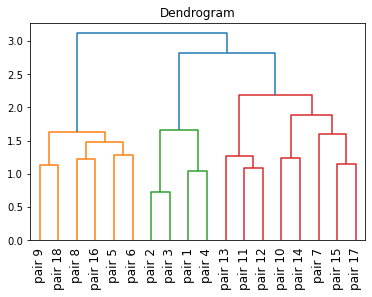

In [28]:
den = hierarchy.dendrogram(hierarchy.linkage(corr, method = 'ward'),
                           labels = corr.index,
                           leaf_rotation=90)
plt.title('Dendrogram')

In [12]:
# Final data to put into those unsupervised learning models
pair_score.head()

,pair 1,pair 2,pair 3,pair 4,pair 5,pair 6,pair 7,pair 8,pair 9,pair 10,pair 11,pair 12,pair 13,pair 14,pair 15,pair 16,pair 17,pair 18
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,13.0,2.0,8.0
1,0.0,0.0,0.0,0.0,0.0,2.0,13.0,1.0,1.0,0.0,0.0,1.0,0.0,5.0,3.0,1.0,8.0,0.0
2,0.0,13.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,5.0,3.0,2.0,0.0
3,0.0,0.0,0.0,0.0,3.0,13.0,0.0,8.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,13.0,3.0,2.0,0.0,5.0,1.0,8.0,0.0


# Principal Component Analysis

In [14]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2).fit(pair_score.T)

In [30]:
pca_score = pca.transform(pair_score.T)

# Explained variance ratio
pca.explained_variance_ratio_

array([0.20535752, 0.12675114])

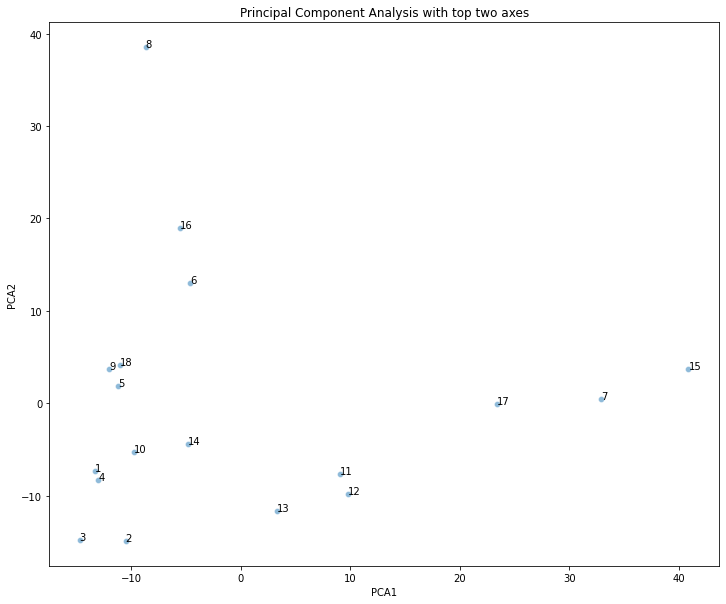

In [18]:
plt.figure(figsize = (12,10))
#plt.scatter(pca_score[:,0], pca_score[:,1])
sns.scatterplot(pca_score[:,0], pca_score[:,1], alpha = 0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Principal Component Analysis with top two axes')

# Annotate label for each dot
for i in range(pca_score.shape[0]):
    plt.annotate(str(i+1), (pca_score[i,0], pca_score[i,1]))

plt.show()

# Truncated Singular Value Decomposition

In [19]:
from sklearn.decomposition import TruncatedSVD

In [35]:
tsvd = TruncatedSVD(n_components=2, random_state=73).fit(pair_score.T)
tsvd_score = tsvd.transform(pair_score.T)

tsvd.explained_variance_ratio_

array([0.14936434, 0.13758249])

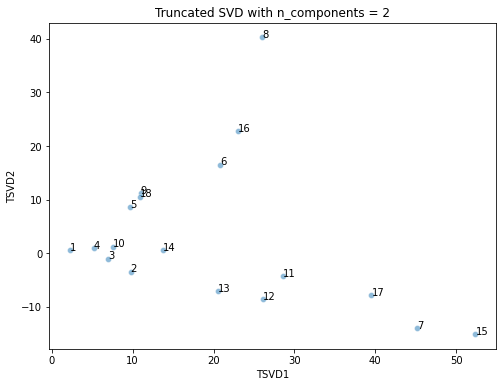

In [21]:
plt.figure(figsize = (8,6))
#plt.scatter(pca_score[:,0], pca_score[:,1])
sns.scatterplot(tsvd_score[:,0], tsvd_score[:,1], alpha = 0.5)
plt.xlabel('TSVD1')
plt.ylabel('TSVD2')
plt.title('Truncated SVD with n_components = 2')

# Annotate label for each dot
for i in range(tsvd_score.shape[0]):
    plt.annotate(str(i+1), (tsvd_score[i,0], tsvd_score[i,1]))

plt.show()

# Extra: Pair Score Sum

In [31]:
df.sum(axis = 0).iloc[1:].astype(int).sort_values(ascending = False)

pair 15    487
pair 7     426
pair 17    387
pair 8     309
pair 11    300
pair 16    268
pair 12    268
pair 6     241
pair 13    221
pair 14    161
pair 9     147
pair 18    141
pair 2     139
pair 5     127
pair 3     119
pair 10     96
pair 4      82
pair 1      36
dtype: int64

# 3D Plot from PCA

In [32]:
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [33]:
pca_3x = PCA(n_components=3).fit(pair_score.T)
pca_3x_score = pca_3x.transform(pair_score.T)

print('Explained variance ratio: %.2f' % (sum(pca_3x.explained_variance_ratio_) * 100))

Explained variance ratio: 43.83


In [34]:
plt.figure(figsize = (10,10))
fig = px.scatter_3d(x = pca_3x_score[:, 0], y = pca_3x_score[:, 1],
                    z = pca_3x_score[:, 2], text = [str(i+1) for i in range(18)],
                    opacity = 0.3, title = '3D Principal Component Analysis Visualization')

fig.update_layout(scene = dict(xaxis = dict(showgrid = False, showticklabels = False),
                               yaxis = dict(showgrid = False, showticklabels = False),
                               zaxis = dict(showgrid = False, showticklabels = False)))
fig.show()

<Figure size 720x720 with 0 Axes>

In [36]:
fig.write_html("./img/pca_3d.html")

In [28]:
pca_3rd = pca_3x_score[:, 2]
pca_3rd_scale = MinMaxScaler().fit_transform(pca_3rd.reshape(1, -1))
pca_3rd_scale

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])